In [1]:
import praw
import time

In [2]:
reddit = praw.Reddit(client_id='xgmRlhZijlhrAw',
                     client_secret='fmbGpkyRsS2Ph87Zdt63zLlFVBY',
                     user_agent='hypopets')

In [3]:
print(reddit.read_only)

True


In [7]:
data = {'post_title': [],
        'score': [],
        'upvote_ratio': [],
        'time': []}

In [106]:
time_count = 0
while time_count<100:
    post=reddit.submission(url='https://www.reddit.com/r/leagueoflegends/comments/cnt2wl/tarzaned_runs_it_down_then_afks_ending_the_game/')
#     data['post_title'].append(post.title)
#     data['score'].append(post.score)
#     data['upvote_ratio'].append(post.upvote_ratio)
#     data['time'].append(time.time())
    with open('test_data.csv', 'a+') as f:
        writer = csv.writer(f)
        writer.writerows([[post.title, post.upvote_ratio, post.score, time.time()]])
    time_count += 1
    time.sleep(5)

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(data)

In [11]:
import altair as alt

In [44]:
df['time'] = pd.to_datetime(df['time'], unit='s', 'US/Eastern')

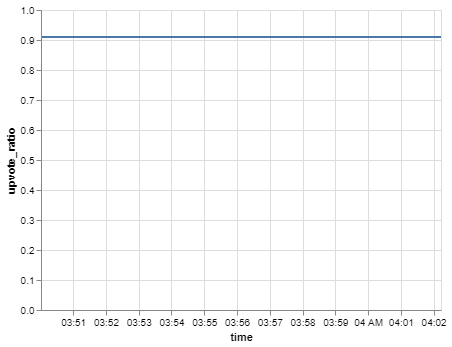

In [55]:
alt.Chart(df.loc[:,'score':'time']).mark_line().encode(
    x = 'time',
    y = 'upvote_ratio')

In [116]:
df = pd.read_csv('test_data.csv', names=['title', 'upvote_ratio', 'upvotes', 'time'])

In [121]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [123]:
chart = alt.Chart(df).mark_line().encode(
    x = 'time',
    y = 'upvote_ratio')

In [125]:
chart.save('chart.html')